# **Research methods and tools**

---
Analysing survey answers for research work "ENHANCING HUMAN-COMPUTER INTERACTION THROUGH AI: IMPACT OF KAZAKH LANGUAGE INTEGRATION IN VOICE ASSISTANTS"


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'survey_answers.csv'
df = pd.read_csv(file_path)
df.rename(columns={'Age:': 'age', 'Gender:': 'gender',
                   'If you use voice assistants, how frequently do you use them? (1-Never, 2-Rarely, 3-Sometimes, 4-Often, 5-Always)': 'using_frequency',
                   "Are you satisfied with the performance of voice assistants?(1- Dissatisfied, 2 - Neutral, 3 - Satisfied)": 'satisfaction',
                   'How likely would you use a voice assistant that supports Kazakh language?(1-Unlikely,  2-Neutral, 3-Likely)': 'how_likely',
                   "Do you use voice assistant technology (e.g., Siri, Google Assistant, Alexa) on your devices?": "do_you_use"}, inplace=True)
# age_mapping = {
#     '17-18': 17.5,
#     '19-20': 19.5,
#     '21-22': 21.5,
#     '23 and more': 23
# }

# df['age'] = df['age'].map(age_mapping)
df['do_you_use'] = df['do_you_use'].map({'Yes': 1, 'No': 0})


df.head(2)

,Отметка времени,age,gender,do_you_use,using_frequency,"In your opinion, what tasks can voice assistants be best used for? (Select all that apply)","In your opinion, how can AI technology be used to improve the performance of voice assistants? (Select all that apply)",What do you think is the primary motivation for using an AI in voice assistant?,What challenges do you think voice assistants have today?(Select all that apply),satisfaction,"If you use voice assistants, in which language do you use it the most?",How can the addition of the Kazakh language to voice assistants benefit Kazakh speakers in accessing digital services more easily? (Select all that apply),"When adding the Kazakh language to voice assistants, what language and cultural aspects are taken into consideration? (Select all that apply)","In your opinion, what are the key factors that contribute to a positive user experience when using voice assistants? (Select all that apply)",how_likely
0,2023/10/23 9:42:16 PM GMT+5,19-20,Male,1,4,Searching the internet;Controlling smart home ...,Improving language recognition and understandi...,Convenience and hands-free operation,Understanding complex or specific queries;Limi...,2,Russian,Ensures that Kazakh-speaking individuals can c...,"Linguistic nuances, phonetics, and grammar of ...",Accurate and relevant responses;Multilingual s...,1
1,2023/10/23 9:45:56 PM GMT+5,19-20,Male,1,2,Setting reminders;Searching the internet,Improving language recognition and understanding,Accessibility for people with disabilities,Understanding complex or specific queries;Limi...,2,Russian,Ensures that Kazakh-speaking individuals can c...,Adaptation to various regional accents and dia...,Personalization and customization options,1


# Descriptive statistics
Numerical data (age, satisfaction, how like wold people use VA in kazakh lanfuage, etc.)

Mean (age): 19.423076923076923
Median (age): 19.5
Mode (age): 19.5
Standard Deviation (age): 1.0449909249283
Skewness (age): -0.05583066804189495


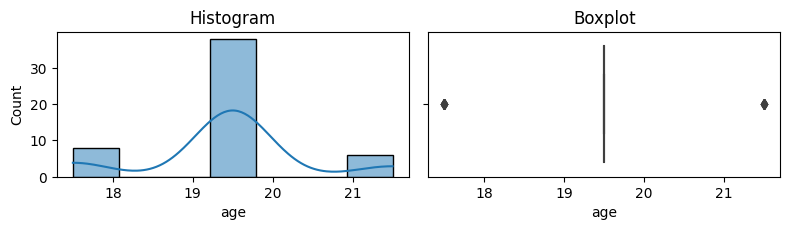

Mean (using_frequency): 2.5185185185185186
Median (using_frequency): 3.0
Mode (using_frequency): 1
Standard Deviation (using_frequency): 1.2993574717040863
Skewness (using_frequency): 0.2793662996108817


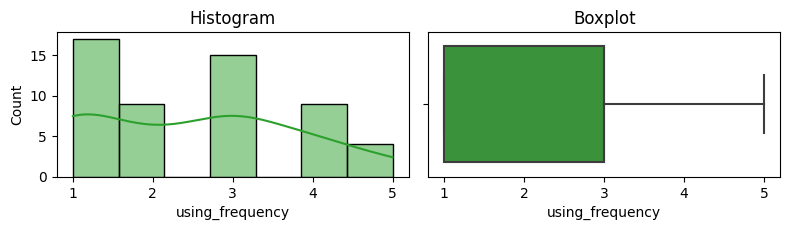

Mean (satisfaction): 2.1296296296296298
Median (satisfaction): 2.0
Mode (satisfaction): 2
Standard Deviation (satisfaction): 0.6157154542602896
Skewness (satisfaction): -0.07818377382489268


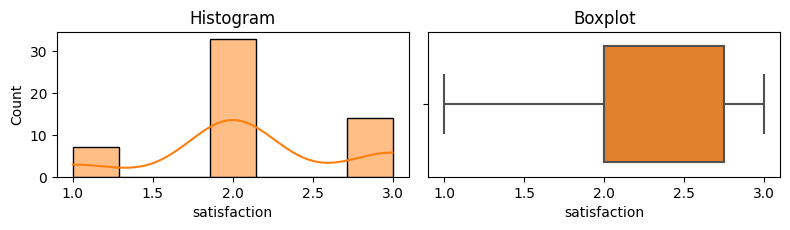

Mean (how_likely): 2.2777777777777777
Median (how_likely): 2.5
Mode (how_likely): 3
Standard Deviation (how_likely): 0.8106988987302967
Skewness (how_likely): -0.5584134754053743


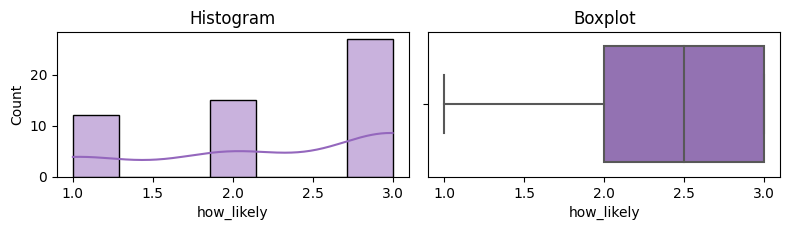

Mean (do_you_use): 0.5925925925925926
Median (do_you_use): 1.0
Mode (do_you_use): 1
Standard Deviation (do_you_use): 0.49596555413404597
Skewness (do_you_use): -0.38774404936943807


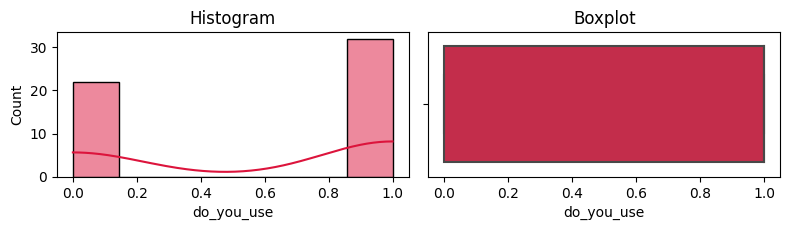

In [ ]:
def descriptive(column_name, color):
    mean_value = df[column_name].mean()
    median_value = df[column_name].median()
    mode_value = df[column_name].mode().iloc[0]  # In case there are multiple modes
    std_deviation_value = df[column_name].std()
    skewness_value = df[column_name].skew()

    # Print Descriptive Statistics
    print(f"Mean ({column_name}): {mean_value}")
    print(f"Median ({column_name}): {median_value}")
    print(f"Mode ({column_name}): {mode_value}")
    print(f"Standard Deviation ({column_name}): {std_deviation_value}")
    print(f"Skewness ({column_name}): {skewness_value}")

    # Visual Representation
    plt.figure(figsize=(8, 4))

    # Histogram
    plt.subplot(2, 2, 1)
    sns.histplot(df[column_name], kde=True, color=color)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(2, 2, 2)
    sns.boxplot(x=df[column_name], color=color)
    plt.title('Boxplot')

    plt.tight_layout()
    plt.show()

# Usage:
descriptive('age', '#1f77b4')
descriptive('using_frequency', '#2ca02c')
descriptive('satisfaction', '#ff7f0e')
descriptive('how_likely', '#9467bd')
voice_assistant_counts = df['do_you_use'].value_counts()
print("Voice Assistant Usage Distribution:\n", voice_assistant_counts)
descriptive('do_you_use', '#DC143C')


Gender Percentage Distribution:
 Male      60.465116
Female    39.534884
Name: gender, dtype: float64


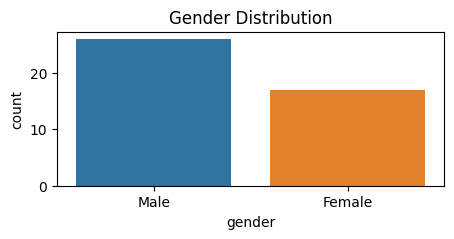

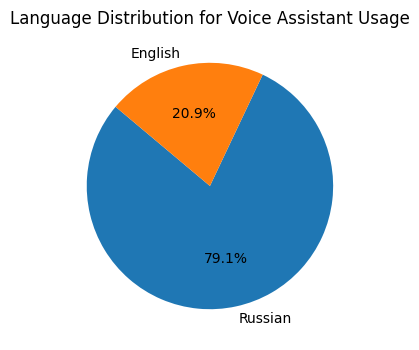

In [ ]:
gender_percentages = df['gender'].value_counts(normalize=True) * 100
print("Gender Percentage Distribution:\n", gender_percentages)
plt.figure(figsize=(5, 2))
sns.countplot(x='gender', data=df, palette=['#1f77b4', '#ff7f0e'])
plt.title('Gender Distribution')
plt.show()

valid_languages = ['Russian', 'English']
df = df[df['If you use voice assistants, in which language do you use it the most?'].isin(valid_languages)]
df = df.reset_index(drop=True)
language_distribution = df['If you use voice assistants, in which language do you use it the most?'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(language_distribution, labels=language_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Language Distribution for Voice Assistant Usage')
plt.show()


In [ ]:
# !pip install pingouin
import pandas as pd
import pingouin as pg

# Assuming 'df' is your DataFrame and 'scale_items' are the columns representing your scale
scale_items = ['using_frequency', 'satisfaction', 'how_likely']

# Extract the relevant columns
scale_data = df[scale_items]

# Calculate Cronbach's alpha
alpha, items_removed = pg.cronbach_alpha(scale_data)

# Print the results
print(f"Cronbach's alpha: {alpha:.3f}")
print("Items removed:", items_removed)


Cronbach's alpha: 0.238
Items removed: [-0.196  0.533]


In [ ]:
import matplotlib.pyplot as plt

# Gender Distribution
gender_labels = ['Male', 'Female']
gender_sizes = [60.47, 39.53]  # Replace with your actual percentages

# Language Preferences
language_labels = ['Russian', 'English']
language_sizes = [79.1, 20.9]  # Replace with your actual percentages

# Different pastel colors for each chart
gender_colors = ['#FF8080', '#F6FDC3']
language_colors = ['#FFCF96', '#CDFAD5']

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Gender Distribution Pie Chart
axes[0].pie(gender_sizes, labels=gender_labels, autopct='%1.1f%%', colors=gender_colors, startangle=90)
axes[0].set_title('Gender Distribution')

# Language Preferences Pie Chart
axes[1].pie(language_sizes, labels=language_labels, autopct='%1.1f%%', colors=language_colors, startangle=90)
axes[1].set_title('Language Preferences')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


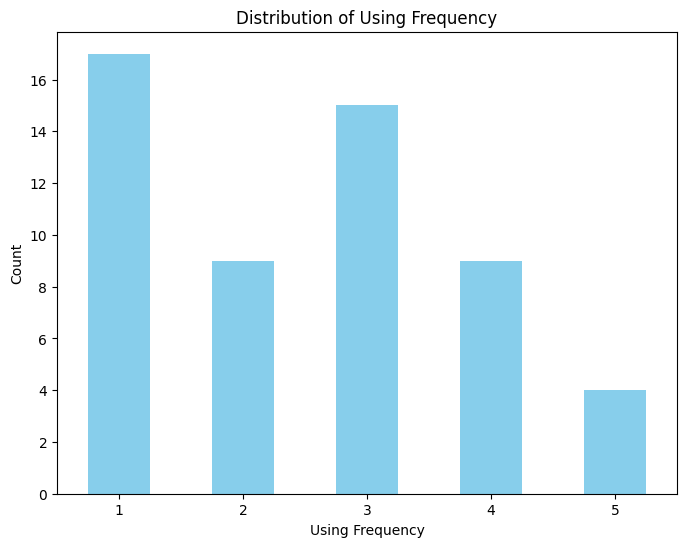

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Count the occurrences of each unique value in the 'using_frequency' column
frequency_counts = df['using_frequency'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
frequency_counts.sort_index().plot(kind='bar', color='skyblue')

# Customize the plot
plt.title('Distribution of Using Frequency')
plt.xlabel('Using Frequency')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed

# Show the plot
plt.show()

In [ ]:
multi_select_columns = [
    "In your opinion, what tasks can voice assistants be best used for? (Select all that apply)",
    "In your opinion, how can AI technology be used to improve the performance of voice assistants? (Select all that apply)",
    "What challenges do you think voice assistants have today?(Select all that apply)",
    "How can the addition of the Kazakh language to voice assistants benefit Kazakh speakers in accessing digital services more easily? (Select all that apply)",
    "When adding the Kazakh language to voice assistants, what language and cultural aspects are taken into consideration? (Select all that apply)",
    "In your opinion, what are the key factors that contribute to a positive user experience when using voice assistants? (Select all that apply)"
]

names = ['_tasks', '_improve', '_challenges', '_benefit', '_aspects', '_factors']

for column, name in zip(multi_select_columns, names):
    unique_responses = set(';'.join(df[column]).split(';'))
    df_question = pd.DataFrame()
    for response in unique_responses:
        df_question[response] = df[column].apply(lambda x: 1 if response in str(x) else 0)
    df_question.to_csv(f'df{name}.csv', index=False)

df_tasks = pd.read_csv('df_tasks.csv')
df_improve = pd.read_csv('df_improve.csv')
df_challenges = pd.read_csv('df_challenges.csv')
df_benefit = pd.read_csv('df_benefit.csv')
df_aspects = pd.read_csv('df_aspects.csv')
df_factors = pd.read_csv('df_factors.csv')

In [ ]:
df_tasks.head(3)

,For listen pronounce of the word,Playing music or podcasts,For translation,Setting reminders,Searching the internet,Sending messages,Controlling smart home devices
0,0,0,0,0,1,0,1
1,0,0,0,1,1,0,0
2,0,0,0,0,1,0,0


In [ ]:
df_improve.head(3)

,Providing more accurate and context-aware responses,Customizing responses based on user preferences,Improving language recognition and understanding,Expanding language support to include Kazakh,Enhancing natural language processing capabilities
0,0,1,1,1,0
1,0,0,1,0,0
2,0,1,1,0,0


In [ ]:
dataframes = [df_tasks, df_improve, df_challenges, df_benefit, df_aspects, df_factors]
questions = ['What tasks can voice assistants be best used for?',
             'How can AI technology be used to improve the performance of voice assistants?',
             'What challenges do you think voice assistants have today?',
             'How can the addition of the Kazakh language to voice assistants benefit Kazakh speakers in accessing digital services more easily?',
             'When adding the Kazakh language to voice assistants, what language and cultural aspects are taken into consideration?',
             'What are the key factors that contribute to a positive user experience when using voice assistants?']

for df_name, question in zip(dataframes, questions):
  print(question)
  print(df_name.mean(), '\n')

What tasks can voice assistants be best used for?
For listen pronounce of the word    0.018519
Playing music or podcasts           0.425926
For translation                     0.018519
Setting reminders                   0.277778
Searching the internet              0.555556
Sending messages                    0.277778
Controlling smart home devices      0.333333
dtype: float64 

How can AI technology be used to improve the performance of voice assistants?
Providing more accurate and context-aware responses    0.370370
Customizing responses based on user preferences        0.296296
Improving language recognition and understanding       0.555556
Expanding language support to include Kazakh           0.648148
Enhancing natural language processing capabilities     0.333333
dtype: float64 

What challenges do you think voice assistants have today?
Inappropriate or irrelevant responses        0.314815
Limited language support                     0.500000
Monotonous or unnatural voice        

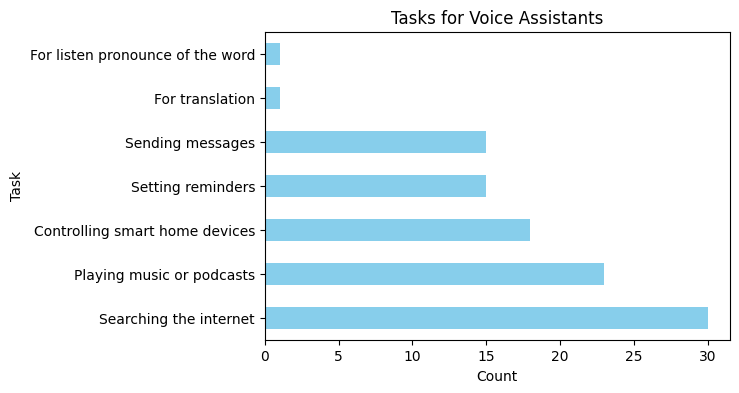

In [ ]:
tasks_counts = df_tasks[df_tasks.columns].sum()
plt.figure(figsize=(6, 4))
tasks_counts.sort_values(ascending=False).plot(kind='barh', color='skyblue')
plt.title('Tasks for Voice Assistants')
plt.xlabel('Count')
plt.ylabel('Task')
plt.show()

# Inferential statistics


## Correlation analysis

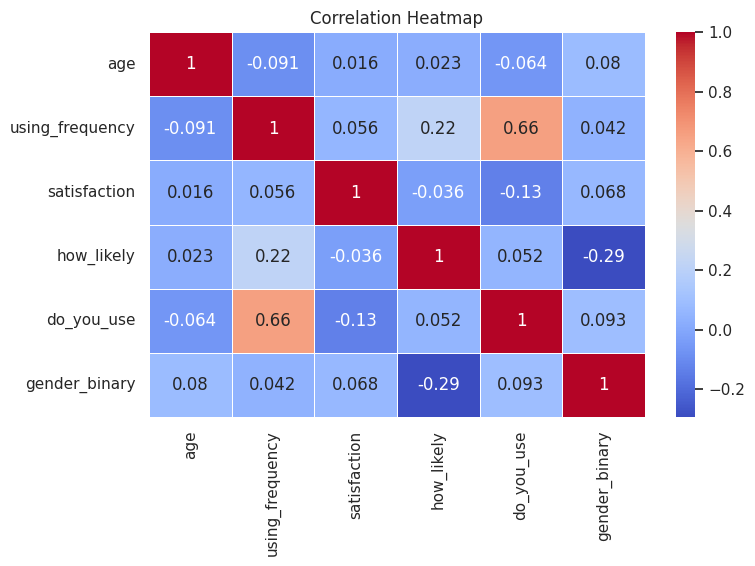

In [ ]:
df['gender_binary'] = df['gender'].map({'Male': 1, 'Female': 0})

numeric_columns = ['age', 'using_frequency', 'satisfaction', 'how_likely', 'do_you_use', 'gender_binary']
correlation_matrix = df[numeric_columns].corr()
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

<ipython-input-4-64c30d7dfa08>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df[numeric_columns].corr()


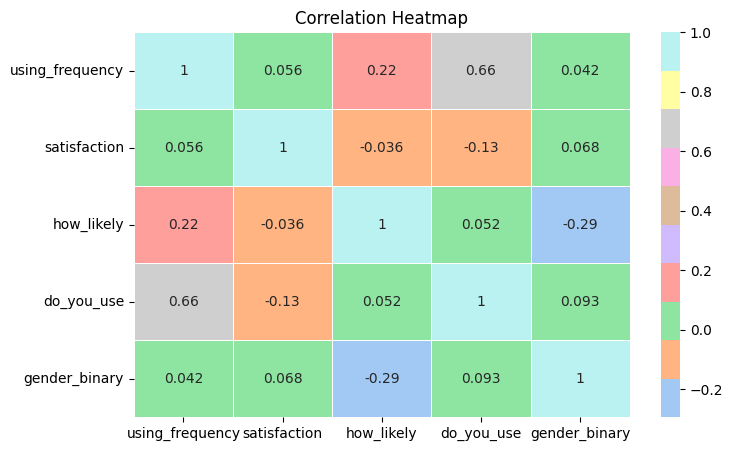

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
df['gender_binary'] = df['gender'].map({'Male': 1, 'Female': 0})

numeric_columns = ['age', 'using_frequency', 'satisfaction', 'how_likely', 'do_you_use', 'gender_binary']
correlation_matrix = df[numeric_columns].corr()
plt.figure(figsize=(8, 5))

# Use a pastel color palette
pastel_palette = sns.color_palette("pastel")

# Create a heatmap with pastel colors
sns.heatmap(correlation_matrix, annot=True, cmap=pastel_palette, linewidths=.5)

plt.title('Correlation Heatmap')
plt.show()

<ipython-input-21-bb089774d8d8>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="gender", y="how_likely", data=df, ci=None, palette="pastel")


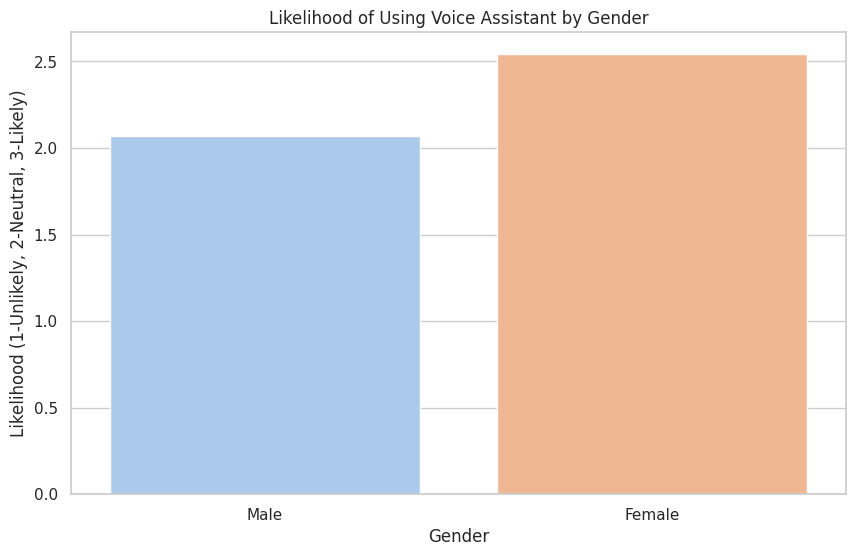

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Use the 'hue' parameter to differentiate bars by gender
sns.barplot(x="gender", y="how_likely", data=df, ci=None, palette="pastel")

plt.title('Likelihood of Using Voice Assistant by Gender')
plt.xlabel('Gender')
plt.ylabel('Likelihood (1-Unlikely, 2-Neutral, 3-Likely)')

plt.show()

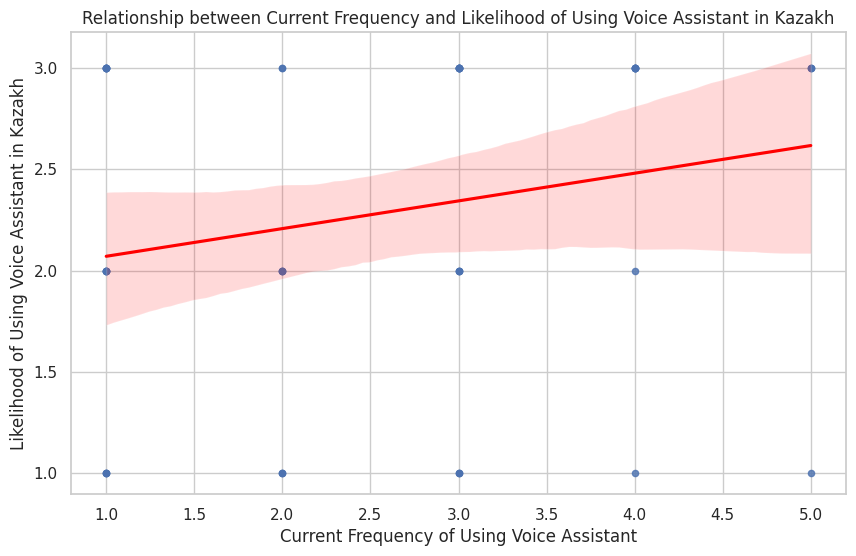

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your data is in a DataFrame called df
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Scatter plot with regression line
sns.regplot(x="using_frequency", y="how_likely", data=df, scatter_kws={'s':20}, line_kws={'color':'red'})

plt.title('Relationship between Current Frequency and Likelihood of Using Voice Assistant in Kazakh')
plt.xlabel('Current Frequency of Using Voice Assistant')
plt.ylabel('Likelihood of Using Voice Assistant in Kazakh')

plt.show()


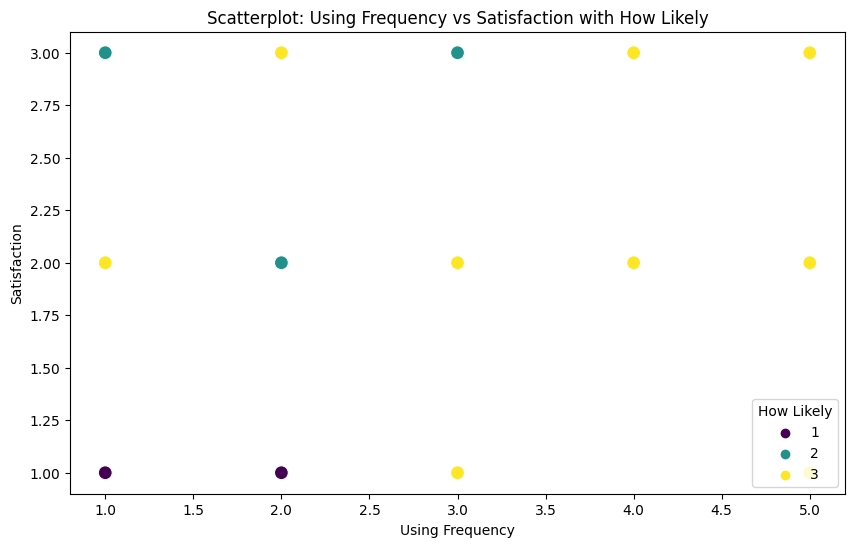

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame
plt.figure(figsize=(10, 6))
sns.scatterplot(x='using_frequency', y='satisfaction', hue='how_likely', data=df, palette='viridis', s=100)

plt.title('Scatterplot: Using Frequency vs Satisfaction with How Likely')
plt.xlabel('Using Frequency')
plt.ylabel('Satisfaction')
plt.legend(title='How Likely')

plt.show()


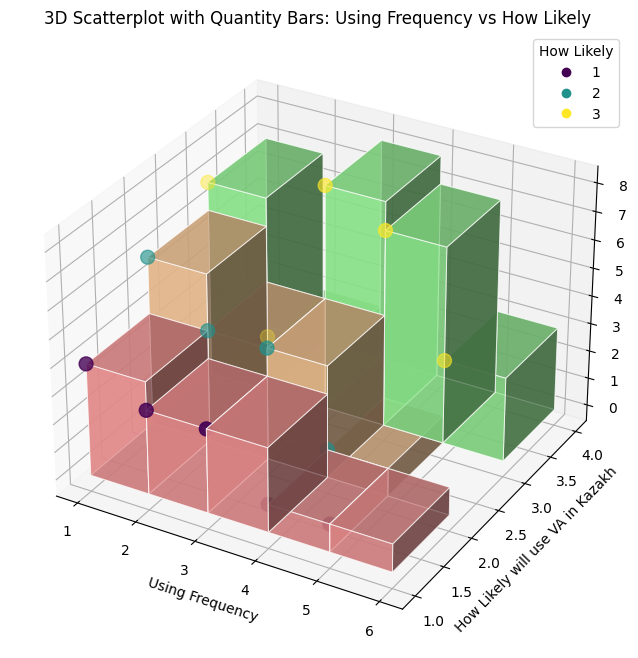

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection

# Define pastel colors
pastel_red = '#FF9999'
pastel_orange = '#FFCC99'
pastel_green = '#99FF99'

# Assuming df is your DataFrame
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Calculate the quantity of each pair
pair_counts = df.groupby(['using_frequency', 'how_likely']).size().reset_index(name='quantity')

# Create the 3D scatter plot
scatter = ax.scatter(pair_counts['using_frequency'], pair_counts['how_likely'], pair_counts['quantity'],
                     c=pair_counts['how_likely'], cmap='viridis', s=100)

# Create bars extending from each point to the z-axis with pastel colors
for x, y, z, color in zip(pair_counts['using_frequency'], pair_counts['how_likely'], pair_counts['quantity'], pair_counts['how_likely']):
    if color == 1:
        bar_color = pastel_red
    elif color == 2:
        bar_color = pastel_orange
    elif color == 3:
        bar_color = pastel_green

    ax.bar3d(x, y, 0, dx=1, dy=1, dz=z, color=bar_color, alpha=0.7, linewidth=0.7, edgecolor='white')

ax.set_title('3D Scatterplot with Quantity Bars: Using Frequency vs How Likely')
ax.set_xlabel('Using Frequency')
ax.set_ylabel('How Likely will use VA in Kazakh')
ax.set_zlabel('Quantity')
ax.legend(*scatter.legend_elements(), title='How Likely')

plt.show()


In [ ]:
df_likelihood_frequency = df[['how_likely', 'using_frequency']]
df_likelihood_frequency = df_likelihood_frequency.sort_values(by='using_frequency')
df_likelihood_frequency
# df_likelihood_frequency.plot(x='how_likely', y='using_frequency', marker='o')
# plt.title('Line Plot')
# plt.xlabel('X-axis')
# plt.ylabel('Y-axis')
# plt.show()

,how_likely,using_frequency
26,2,1
19,3,1
18,2,1
17,3,1
16,2,1
15,1,1
37,3,1
38,1,1
25,1,1
40,3,1


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame
data = {'Category': ['A', 'B', 'C', 'D'],
        'Value': [15, 8, 12, 20]}

df = pd.DataFrame(data)

# Bar plot
df.plot(x='Category', y='Value', kind='bar', rot=0)
plt.title('Bar Plot')
plt.xlabel('Category')
plt.ylabel('Value')
plt.show()

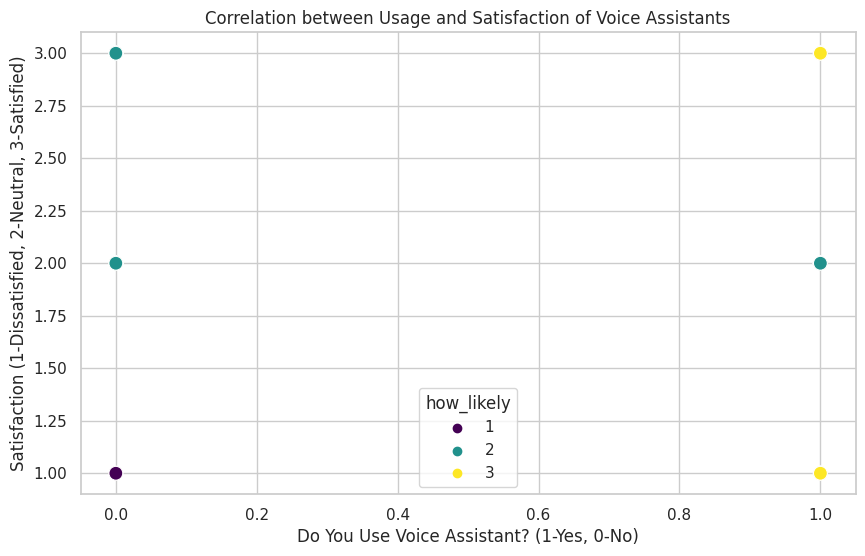

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your data is in a DataFrame called df
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Scatter plot
sns.scatterplot(x="do_you_use", y="satisfaction", data=df, hue="how_likely", palette="viridis", s=100)

plt.title('Correlation between Usage and Satisfaction of Voice Assistants')
plt.xlabel('Do You Use Voice Assistant? (1-Yes, 0-No)')
plt.ylabel('Satisfaction (1-Dissatisfied, 2-Neutral, 3-Satisfied)')

plt.show()

## Hypothesis testing

Gender and Voice Assistant Use are independent.


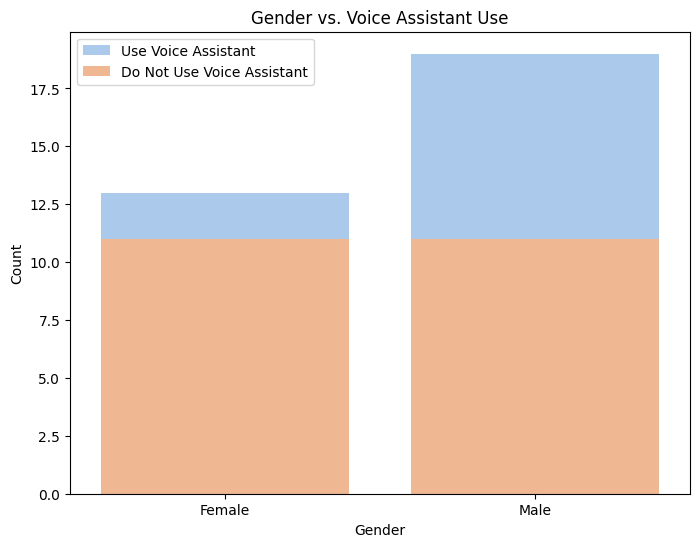

In [ ]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['gender'], df['do_you_use'])

chi2, p_value, _, _ = chi2_contingency(contingency_table)

if p_value < 0.05:
    print("Gender and Voice Assistant Use are dependent.")
else:
    print("Gender and Voice Assistant Use are independent.")

contingency_table = pd.crosstab(df['gender'], df['do_you_use'])

# Plot the stacked bar chart
plt.figure(figsize=(8, 6))

# Use a pastel color palette
pastel_palette = sns.color_palette("pastel")

# Create a bar plot with pastel colors
sns.barplot(x=contingency_table.index, y=contingency_table[1], color=pastel_palette[0], label='Use Voice Assistant')
sns.barplot(x=contingency_table.index, y=contingency_table[0], color=pastel_palette[1], label='Do Not Use Voice Assistant')

plt.title('Gender vs. Voice Assistant Use')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend()


# Annotate the p-value
plt.annotate(f'p-value: {p_value:.4f}', xy=(0.5, -0.2), ha='center', va='center', fontsize=12, color='red')

plt.show()

Fail to reject the null hypothesis. 'how_likely' and 'using_frequency' are independent.


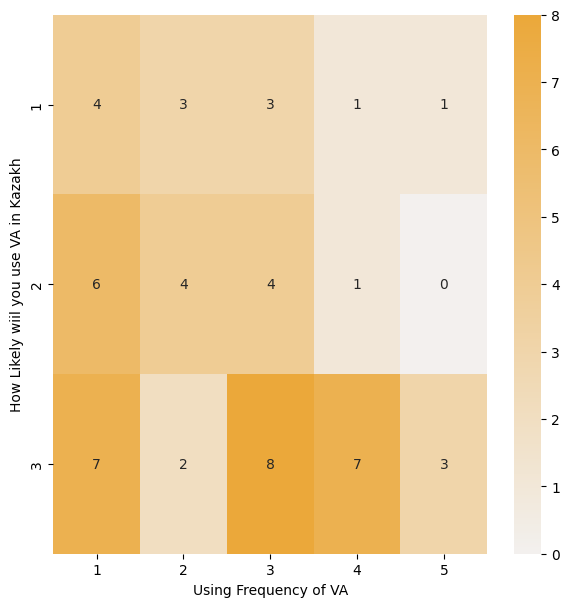

In [ ]:
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

# Create a contingency table
contingency_table = pd.crosstab(df['how_likely'], df['using_frequency'])

# Perform Chi-squared test
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Set significance level
alpha = 0.05

# Check for significance
if p_value < alpha:
    print("Reject the null hypothesis. 'how_likely' and 'using_frequency' are dependent.")
else:
    print("Fail to reject the null hypothesis. 'how_likely' and 'using_frequency' are independent.")

green_palette = sns.light_palette("#EBA83A", as_cmap=True)

plt.figure(figsize=(7, 7))
sns.heatmap(contingency_table, annot=True, cmap=green_palette, fmt='d', cbar=True)

plt.xlabel('Using Frequency of VA')
plt.ylabel('How Likely wiil you use VA in Kazakh')

plt.show()

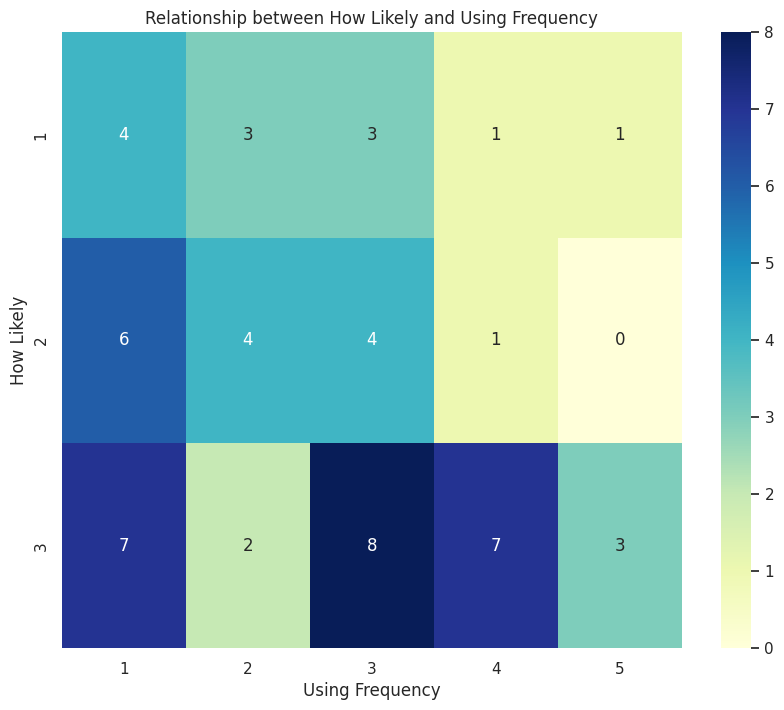

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a contingency table
contingency_table = pd.crosstab(df['how_likely'], df['using_frequency'])

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(contingency_table, annot=True, cmap='YlGnBu', fmt='d', cbar=True)

plt.title('Relationship between How Likely and Using Frequency')
plt.xlabel('Using Frequency')
plt.ylabel('How Likely')

plt.show()


## Regression analysis

In [ ]:
import statsmodels.api as sm
df['age'].fillna(df['age'].mean(), inplace=True)

X = df[['age', 'using_frequency', 'satisfaction', 'gender_binary', 'do_you_use']]
y = df['how_likely']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             how_likely   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     1.776
Date:                Mon, 23 Oct 2023   Prob (F-statistic):              0.136
Time:                        21:24:44   Log-Likelihood:                -60.203
No. Observations:                  54   AIC:                             132.4
Df Residuals:                      48   BIC:                             144.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               1.2782      2.103     

A coefficient with a p-value less than 0.05 is often considered statistically significant. In this case, the coefficient for 'gender_binary' appears to be statistically significant because its p-value is 0.032.

The coefficient for 'using_frequency' has a p-value close to 0.05 (0.069), suggesting a marginally significant relationship.

The other predictors ('age', 'satisfaction', 'do_you_use') do not appear to be statistically significant at the 0.05 significance level.